In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_csv("./glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 목적 : 원소에 함량에 따라 Glass 유형을 추측

In [3]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
len(glass.columns)

10

In [7]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors()
nn.fit(glass)
distances, indices = nn.kneighbors(glass)
indices

array([[  0,  18,  62,  36,  65],
       [  1,   2,  58,  59,   4],
       [  2,   1,  58,   4,   6],
       ...,
       [211, 212, 213, 194, 203],
       [212, 211, 213, 194, 203],
       [213, 211, 212, 194, 193]])

In [8]:
features = glass.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [9]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Skewness / 왜도에 대하여

- 왜곡 정도는 데이터 분포의 대칭성이 얼마나 결핍되어 있는지를 측정한다.
- 완전히 대칭인 경우 Skewness가 0이다. 

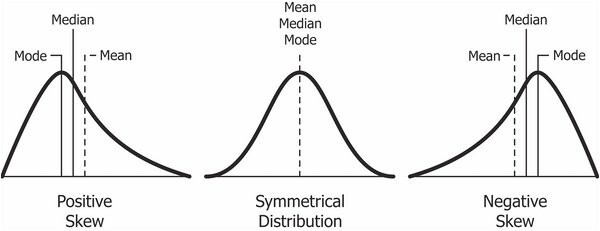

In [10]:
display(Image(filename="Skewness.jpeg"))

- Positive Skew는 평균과 중위수가 Mode보다 크다.
- Negative Skew는 평균과 중위수가 Mode보다 작다.

### 기준
- -0.5 < skew < 0.5 인 경우 데이터가 상당히 대칭적이다.
- -1 < skew < -0.5 or 0.5 < skew < 1 인 경우 데이터가 적당히 치우쳐져 있다.
- skew < -1 or 1 < skew 인 경우 데이터가 상당히 치우쳐있다.

In [11]:
glass.corr()['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

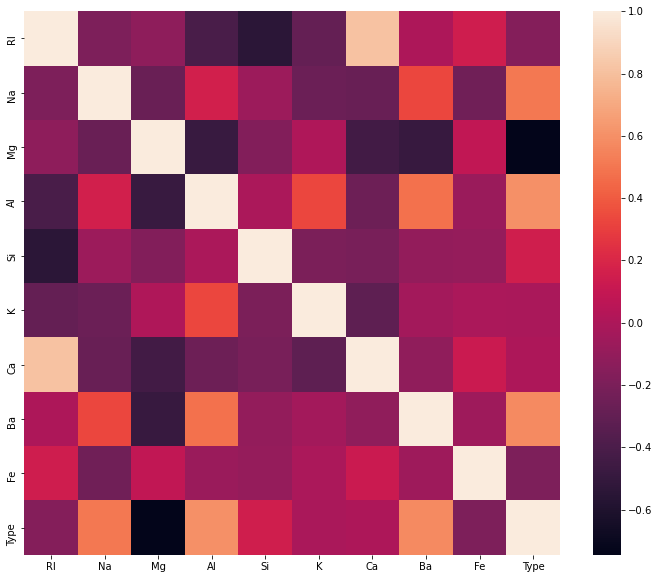

In [12]:
plt.figure(figsize=(12, 10))
heat = sns.heatmap(glass.corr())

### 왜도 표현하기

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


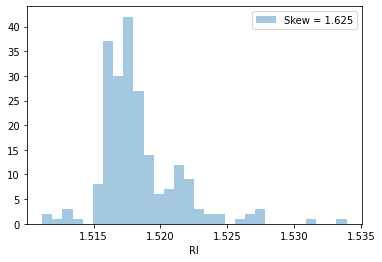

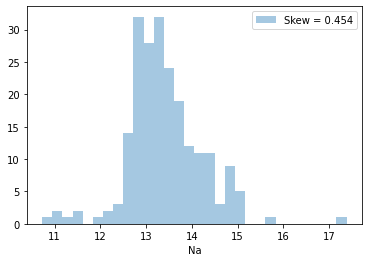

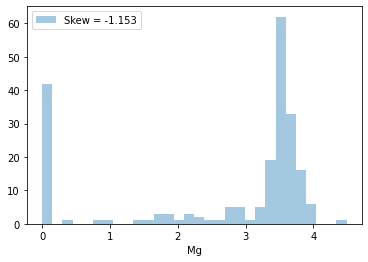

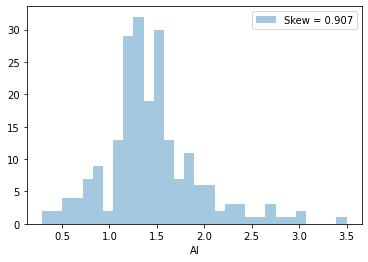

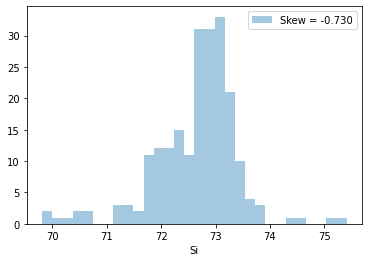

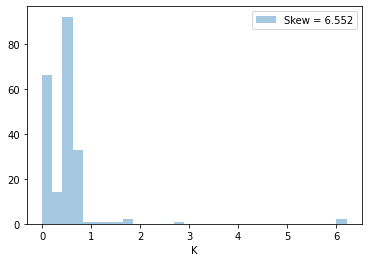

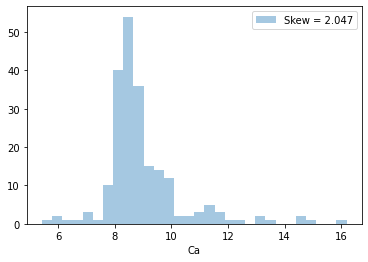

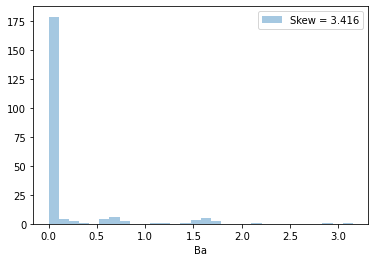

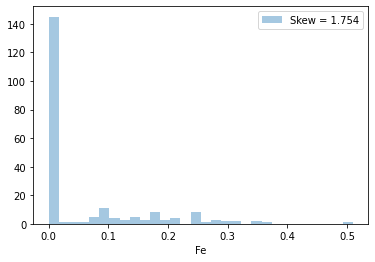

In [13]:
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde=False, label="Skew = %.3f" %(skew), bins=30)
    plt.legend(loc="best")
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


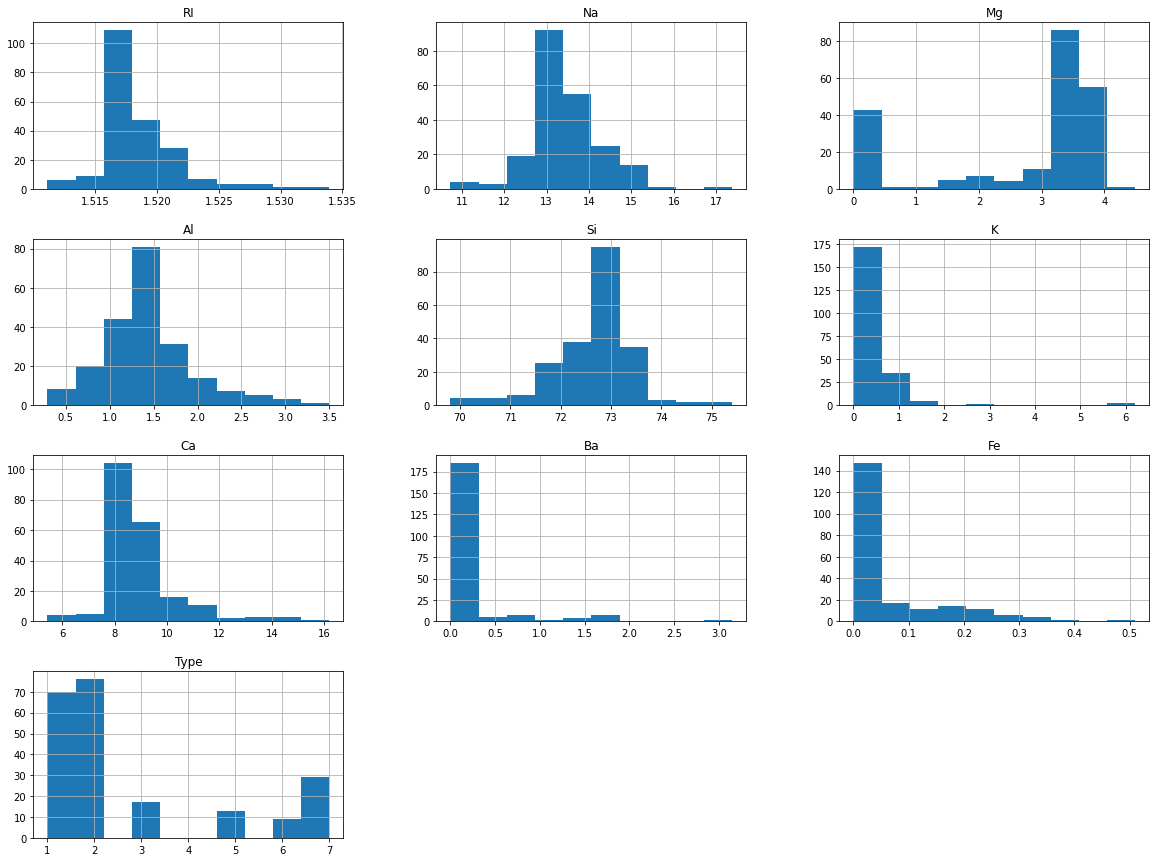

In [14]:
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
glass.hist(ax=ax)
plt.show()

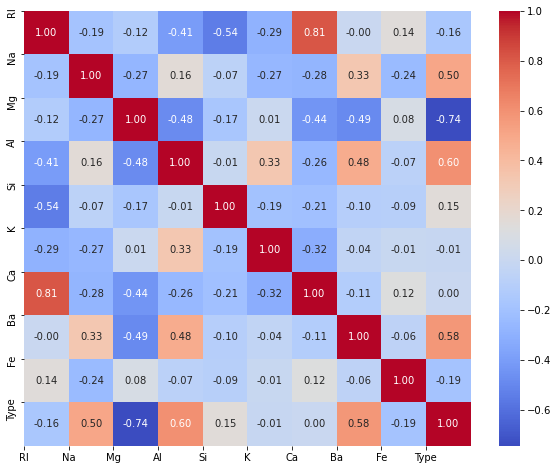

In [17]:
corr = glass.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

- https://www.kaggle.com/slamnz/glass-dataset-principal-components-analysis
- https://www.kaggle.com/sonerkar/glass-classification-f1-score-80
- https://www.kaggle.com/tolgahancepel/glass-classification-analysis-with-eda

### PCA 활용해 데이터 분포 살펴보기

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(glass)

PCA()

In [19]:
pca.n_components_

10

In [21]:
from pandas import DataFrame

pca_applied = DataFrame(pca.transform(glass))
pca_applied.columns = ["P" + str(i) for i in range(1, 11)]
pca_applied.round(2).head(10)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,-2.46,-0.23,-1.19,-0.16,-0.18,0.11,-0.08,-0.07,0.01,-0.0
1,-1.98,-0.96,-0.12,-0.30,0.77,-0.04,-0.12,-0.05,-0.02,-0.0
2,-1.99,-0.94,0.28,-0.32,0.61,0.16,-0.26,-0.06,0.02,-0.0
3,-2.12,-0.50,0.09,0.02,0.27,0.07,-0.02,-0.05,0.09,-0.0
4,-2.07,-0.66,0.43,-0.28,0.37,0.03,0.04,-0.06,-0.00,-0.0
5,-2.10,-0.59,0.67,0.12,0.15,0.27,-0.23,0.18,-0.01,0.0
6,-2.06,-0.56,0.41,-0.30,0.38,-0.04,0.13,-0.06,-0.02,-0.0
7,-2.08,-0.48,0.57,-0.37,0.27,-0.04,0.21,-0.06,-0.02,-0.0
8,-1.94,-0.52,-0.71,0.05,0.77,-0.11,-0.16,-0.06,-0.03,-0.0
9,-2.06,-0.31,0.48,-0.10,0.18,0.11,-0.05,0.03,-0.06,-0.0


In [22]:
pca.explained_variance_ratio_

array([5.75976030e-01, 2.34834244e-01, 6.48310909e-02, 5.99425143e-02,
       3.55515610e-02, 1.87162056e-02, 9.18012764e-03, 8.31112884e-04,
       1.37023412e-04, 8.98428749e-08])

### 모델에 적용하기

In [23]:
from sklearn.model_selection import train_test_split

X = glass.drop('Type', axis=1).values
y = glass['Type'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=42)

### Logistic Regression with f1_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


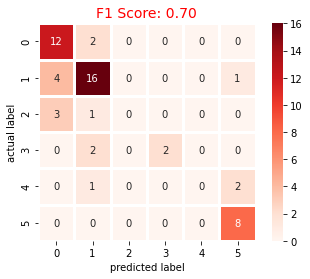

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=8)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

f1_score_logr = f1_score(y_test, y_pred, average="micro")
cm_logr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Reds", color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}', size=14, color='red')
plt.show()

### Logistic Regression with Scaler

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

classifier_lr = LogisticRegression()
steps = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}

# cv는 교차 검증을 위해 분할되는 폴드 수를 말함
classifier_lr = GridSearchCV(lr_pipe, parameters, cv=3)

# ravle은 다차원 배열을 1차원 배열로 펴줌 앞서 사용한 reshape(-1, 1)과 같은 역할
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.68125
Test set:  0.6666666666666666


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    train_acc.append(score)
    test_acc.append((prediction==y_test).mean())
    print('k: %d, accuracy: %.2f'%(k, score*100))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, accuracy: 77.78


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 2, accuracy: 68.52


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 3, accuracy: 70.37


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 4, accuracy: 64.81


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, accuracy: 62.96


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 6, accuracy: 61.11


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 7, accuracy: 59.26


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 8, accuracy: 59.26


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, accuracy: 59.26


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 10, accuracy: 61.11


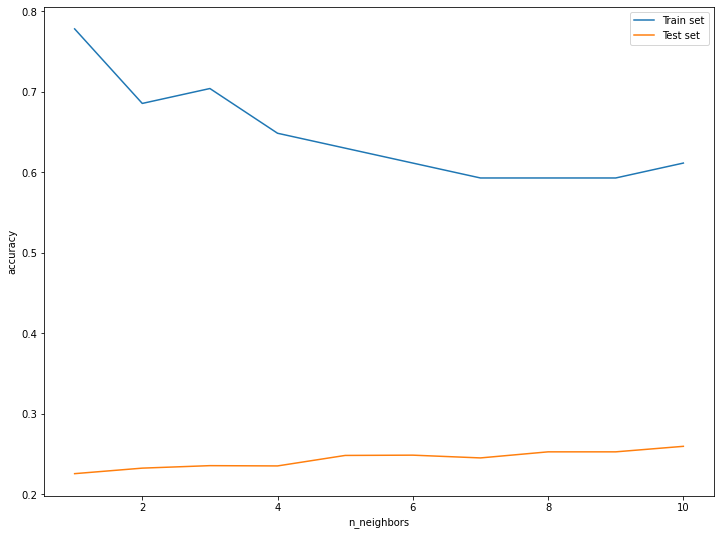

In [32]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), train_acc, label="Train set")
plt.plot(range(1, 11), test_acc, label="Test set")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

### KNN with f1score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


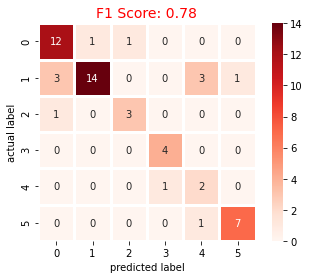

In [33]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

f1_score_knn = f1_score(y_test, y_pred, average='micro')
cm_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_knn, annot=True, fmt='.0f', linewidths=3, square=True, 
           cmap='Reds', color='#cd1076')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_knn:.2f}', size=14, color='red')
plt.show()

### KNN with Scaler

In [35]:
classifier_knn = KNeighborsClassifier()
steps = [
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [1, 3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}

classifier_knn = GridSearchCV(knn_pipe, parameters, cv=3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  1.0
Test set:  0.7407407407407407


## Elastic Net

In [39]:
# 엘라스틱넷 회귀분석이란 정규화 선형회귀의 일정으로 선형회귀 계수에 대한 제약 조건을 추가하여
# 모델의 과적합을 막는 방법임
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

ratios = [0.2, 0.5, 0.8]

for ratio in ratios:    
    enet = ElasticNet(alpha=0.1, l1_ratio=ratio)

    y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
    r2_score_enet = r2_score(y_test, y_pred_enet)
    print(enet)
    print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.2)
r^2 on test data : 0.811389
ElasticNet(alpha=0.1)
r^2 on test data : 0.802220
ElasticNet(alpha=0.1, l1_ratio=0.8)
r^2 on test data : 0.787231


In [40]:
alpahs = [0.01, 0.1, 1, 10]

for alpha in alpahs:    
    enet = ElasticNet(alpha=alpha, l1_ratio=0.2)

    y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
    r2_score_enet = r2_score(y_test, y_pred_enet)
    print(enet)
    print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.01, l1_ratio=0.2)
r^2 on test data : 0.818729
ElasticNet(alpha=0.1, l1_ratio=0.2)
r^2 on test data : 0.811389
ElasticNet(alpha=1, l1_ratio=0.2)
r^2 on test data : 0.680367
ElasticNet(alpha=10, l1_ratio=0.2)
r^2 on test data : -0.010455


ElasticNet(alpha=0.01, l1_ratio=0.2)
r^2 on test data : 0.818729


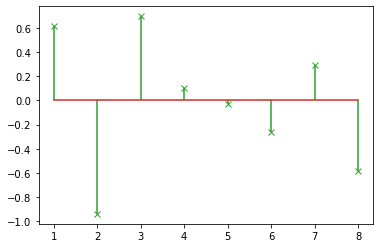

In [46]:
enet = ElasticNet(alpha=0.01, l1_ratio=0.2)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
plt.show()

### ElasticNetCV

In [49]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(cv=3, random_state=0)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
y_score_enet = r2_score(y_test, y_pred_enet)
print(y_score_enet)

0.8025622630336134


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ElasticNet with Scaler

In [48]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.2)
)

pipeline.fit(X_train, y_train)
pipeline_pred = pipeline.predict(X_test)

r2_score_enet = r2_score(y_test, pipeline_pred)
print(r2_score_enet)

0.8207610490896127


## SVM

### SVM with f1_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


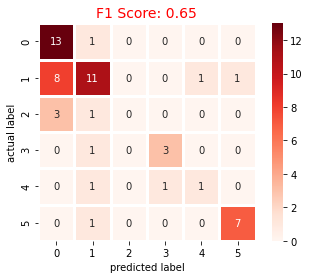

In [51]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability=True)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

f1_score_svc = f1_score(y_test, y_pred, average='micro')
cm_svc = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svc, annot=True, fmt=".0f", linewidths=3, square=True, cmap="Reds", color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_svc:.2f}', size=14, color='red')
plt.show()

### SVM with Scaler

In [52]:
classifier_svm = SVC()
steps = [
    ('scaler', StandardScaler()),
    ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}

classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, cv=3)
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train.ravel())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set : ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set : ", accuracy_svm_linear_test)

Training set :  0.75
Test set :  0.7037037037037037


In [53]:
classifier_svm = SVC()
steps = [
    ('scaler', StandardScaler()),
    ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

parameters = { 'model__kernel' : ['rbf', 'poly', 'sigmoid'],
               'model__C' : [1,10,100,1000,10000],
               'model__gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
               'model__random_state' : [42],
               'model__degree' : [1,2,3]
}

classifier_svm_kernel = GridSearchCV(svm_linear_pipe, parameters, cv=3)
classifier_svm_kernel = classifier_svm_kernel.fit(X_train, y_train.ravel())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set : ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set : ", accuracy_svm_kernel_test)

Training set :  0.94375
Test set :  0.7222222222222222
